## This notebook preents three different approaches to using chained models.

1. Linear models with polynomials
2. Neural networks with feature scaling
3. Linear models with dummies.

In [26]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import StandardScaler as ss
from sklearn import metrics
import pandas as pd
import json
from dbanalysis import stop_tools
routes = json.loads(open('/home/student/dbanalysis/dbanalysis/resources/trimmed_routes.json','r').read())
route = routes['15'][1]
models = []
scalers = []
all_dummies = []

In [27]:
features = ['rain','temp','vappr','hour','hour2','hour3','hour4']
features += ['day','day2','day3','day4','hour','hour2','hour3','hour4']
for i in range(1,len(route)-1):
    stopA = str(route[i])
    stopB = str(route[i+1])
    print('Building for',stopA,'to',stopB)

    df = stop_tools.stop_data(stopA,stopB)
    df['traveltime'] = df['actualtime_arr_to'] - df['actualtime_arr_from']
    df = df[df['traveltime']>0]
    for i in range(2,5):
        df['hour'+str(i)] = df['hour'] ** i
        df['day'+str(i)] = df['day'] ** i
    
    model = lr(fit_intercept=True).fit(df[features],df['traveltime'])
    preds = model.predict(df[features])
    from sklearn import metrics
    print('model for:',stopA,'to',stopB)
    print('min pred:',preds.min())
    print('mean pred:',preds.mean())
    print('max pred:',preds.max())
    print('Mape:',((abs(df['traveltime']-preds)/df['traveltime'])*100).mean())
    print('r2:',metrics.r2_score(df['traveltime'],preds))
    print('mae:',metrics.mean_absolute_error(df['traveltime'],preds),'\n\n')
    models.append(model)
    del(df)


Building for 6318 to 6319
model for: 6318 to 6319
min pred: 20.728488576577227
mean pred: 23.921631806018254
max pred: 28.81993016278775
Mape: 20.064801045352805
r2: 0.003493569373023142
mae: 5.171020225647756 


Building for 6319 to 7246
model for: 6319 to 7246
min pred: 29.39700360523254
mean pred: 41.01923596477009
max pred: 57.03003170954794
Mape: 32.55881391829685
r2: 0.018422596983922457
mae: 11.726708526660076 


Building for 7246 to 6320
model for: 7246 to 6320
min pred: 64.983029592176
mean pred: 89.62739550525811
max pred: 102.00779612339014
Mape: 22.456853708228444
r2: 0.009706898490921989
mae: 19.732710119127045 


Building for 6320 to 4594
model for: 6320 to 4594
min pred: 30.293826367030306
mean pred: 86.70089403798399
max pred: 115.08923469912145
Mape: 31.95018428849251
r2: 0.0769795221509445
mae: 28.058474627729236 


Building for 4594 to 4595
model for: 4594 to 4595
min pred: 62.64253922118138
mean pred: 91.5390785793445
max pred: 99.84996139319298
Mape: 18.53278047911

model for: 1017 to 1018
min pred: 2.599557866712942
mean pred: 43.75297741960686
max pred: 69.37404459527674
Mape: 52.66950925053941
r2: 0.1445447095514042
mae: 19.977232990007135 


Building for 1018 to 1019
model for: 1018 to 1019
min pred: 10.869470950957723
mean pred: 30.968296081600773
max pred: 45.07848021862219
Mape: 56.736711424927954
r2: 0.1482809668537377
mae: 13.490679498576759 


Building for 1019 to 1020
model for: 1019 to 1020
min pred: 10.766270495173316
mean pred: 37.30377968558366
max pred: 49.25267910395492
Mape: 40.41896333658823
r2: 0.20233766980671664
mae: 12.508293607117599 


Building for 1020 to 1076
model for: 1020 to 1076
min pred: 11.041395457321784
mean pred: 54.62623348851715
max pred: 67.12967020716205
Mape: 27.317425007703257
r2: 0.20981004332098518
mae: 13.257692391023223 


Building for 1076 to 1077
model for: 1076 to 1077
min pred: 40.746323510067675
mean pred: 67.6465463679027
max pred: 89.29460205544154
Mape: 26.72228925785383
r2: 0.1445201506743159


# again with standardization

actually we didn't run the standardization code for the results, as the model predicts were exactly the same while we were building them

In [13]:
models = []
scalers = []

In [14]:
features = ['rain','temp','vappr','hour','hour2','hour3','hour4']
features += ['day','day2','day3','day4','hour','hour2','hour3','hour4']
for i in range(1,len(route)-1):
    stopA = str(route[i])
    stopB = str(route[i+1])
    print('Building for',stopA,'to',stopB)

    df = stop_tools.stop_data(stopA,stopB)
    df['traveltime'] = df['actualtime_arr_to'] - df['actualtime_arr_from']
    df = df[df['traveltime']>0]
    for i in range(2,5):
        df['hour'+str(i)] = df['hour'] ** i
        df['day'+str(i)] = df['day'] ** i
    scaler = ss()
    X=scaler.fit_transform(df[features])
    
    model = lr(fit_intercept=True).fit(X,df['traveltime'])
    preds = model.predict(X)
    from sklearn import metrics
    print('model for:',stopA,'to',stopB)
    print('min pred:',preds.min())
    print('mean pred:',preds.mean())
    print('max pred:',preds.max())
    print('Mape:',((abs(df['traveltime']-preds)/df['traveltime'])*100).mean())
    print('r2:',metrics.r2_score(df['traveltime'],preds))
    print('mae:',metrics.mean_absolute_error(df['traveltime'],preds),'\n\n')
    models.append(model)
    scalers.append(scaler)
    del(df)


Building for 6318 to 6319
model for: 6318 to 6319
min pred: 20.728488576578542
mean pred: 23.92163180601824
max pred: 28.819930162788843
Mape: 20.064801045352297
r2: 0.003493569373023142
mae: 5.171020225647709 


Building for 6319 to 7246
model for: 6319 to 7246
min pred: 29.397003605233067
mean pred: 41.0192359647701
max pred: 57.03003170954888
Mape: 32.558813918296906
r2: 0.018422596983922457
mae: 11.726708526660099 


Building for 7246 to 6320
model for: 7246 to 6320
min pred: 64.98302959217705
mean pred: 89.6273955052581
max pred: 102.00779612339905
Mape: 22.45685370822841
r2: 0.009706898490921767
mae: 19.732710119126935 


Building for 6320 to 4594
model for: 6320 to 4594
min pred: 30.293826366972397
mean pred: 86.70089403798339
max pred: 115.08923469913124
Mape: 31.950184288495098
r2: 0.07697952215094439
mae: 28.058474627731023 


Building for 4594 to 4595
model for: 4594 to 4595
min pred: 62.64253922116497
mean pred: 91.53907857934456
max pred: 99.84996139320117
Mape: 18.5327804

model for: 1018 to 1019
min pred: 10.869470950966726
mean pred: 30.968296081600784
max pred: 45.07848021863143
Mape: 56.7367114249289
r2: 0.14828096685373804
mae: 13.490679498576679 


Building for 1019 to 1020
model for: 1019 to 1020
min pred: 10.766270495209625
mean pred: 37.303779685583685
max pred: 49.252679103937496
Mape: 40.41896333659385
r2: 0.20233766980671675
mae: 12.508293607117897 


Building for 1020 to 1076
model for: 1020 to 1076
min pred: 11.041395457268258
mean pred: 54.62623348851712
max pred: 67.12967020715897
Mape: 27.317425007700905
r2: 0.20981004332098507
mae: 13.257692391022998 


Building for 1076 to 1077
model for: 1076 to 1077
min pred: 40.746323510055575
mean pred: 67.64654636790269
max pred: 89.29460205548398
Mape: 26.722289257852857
r2: 0.14452015067431612
mae: 15.533565175379644 


Building for 1077 to 1078
model for: 1077 to 1078
min pred: 34.849715224829666
mean pred: 53.18938462295243
max pred: 65.47319542211345
Mape: 24.567818250796535
r2: 0.09056451440

In [28]:
def get_merged(stop):
    route = routes['15'][1][1:]
    begins = stop_tools.stop_data(str(route[0]),str(route[1]))
    ends = stop_tools.stop_data(str(route[int(stop)]),str(route[int(stop)+1]))
    ends['end'] = ends['actualtime_arr_to']
    merged = pd.merge(begins,ends[['tripid','dayofservice','routeid','end']], on=['tripid','dayofservice','routeid'])
    for i in range(2,5):
        merged['hour'+str(i)]=merged['hour']**i
        merged['day'+str(i)]=merged['day']**i
    return merged

In [29]:
def run_to_stop(number,verbose=True):
    features = ['rain','temp','vappr','hour','hour2','hour3','hour4']
    features += ['day','day2','day3','day4','hour','hour2','hour3','hour4']
    import copy
    global route
    stop = str(route[number])
    index = 0
    merged = get_merged(number)
    df = copy.deepcopy(merged)
    for model in models:
        index+=1
        cur_stop = route[index]
        if cur_stop == route[number+1]:
            break
        traveltime = model.predict(df[features])
        #print(traveltime.mean())
        df['actualtime_arr_from'] = df['actualtime_arr_from'] + traveltime
        df = df[[i for i in df.columns if i[0:4] != 'hour']]
        df['hour'] = (df['actualtime_arr_from'] //3600).astype('int64')
        #arr.append(copy.deepcopy(df))

        for i in range(2,5):
            df['hour'+str(i)] = df['hour'] ** i
            df['day'+str(i)] = df['day'] ** i
    real_traveltimes = merged['end'] - merged['actualtime_arr_from']

    pred_traveltimes = df['actualtime_arr_from'] - merged['actualtime_arr_from']
    if verbose:
        print(df['actualtime_arr_from'].mean())
        print('MAE:',metrics.mean_absolute_error(real_traveltimes,pred_traveltimes))
        print('MAPE:',((abs(real_traveltimes-pred_traveltimes)/real_traveltimes)*100).mean())
        print('r2:',metrics.r2_score(real_traveltimes,pred_traveltimes))
    return metrics.r2_score(real_traveltimes,pred_traveltimes),((abs(real_traveltimes-pred_traveltimes)/real_traveltimes)*100).mean()

In [37]:
run_to_stop(50)

53826.75835217127
MAE: 397.87508838171243
MAPE: 10.329439445222436
r2: 0.19768509475486185


In [38]:
run_to_stop(30)

52367.220484716105
MAE: 217.49731682926443
MAPE: 11.372124874584278
r2: 0.17789703688614966


In [39]:
run_to_stop(66)

54568.5116219279
MAE: 480.37541393744016
MAPE: 9.95534538916748
r2: 0.32067894552340714


In [40]:
run_to_stop(20)

51835.013235454106
MAE: 147.11913390624048
MAPE: 11.332997482631773
r2: 0.21731662241536487


In [41]:
run_to_stop(10)

51302.41148058582
MAE: 98.94940433349957
MAPE: 13.152728173579995
r2: 0.030497401112532296


In [42]:
run_to_stop(5)

51013.0273753877
MAE: 63.33216968744365
MAPE: 14.959241217770305
r2: -0.08053205723882817


In [31]:
import time
t=time.time()
MAPES = []
r2s = []
for i in range(1,65):
    print(i)
    r2,MAPE = run_to_stop(i,verbose=False)
    r2s.append(r2)
    MAPES.append(MAPE)
print(t-time.time())
print(sum(MAPES)/len(MAPES))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
-257.4268913269043
13.404482973623473


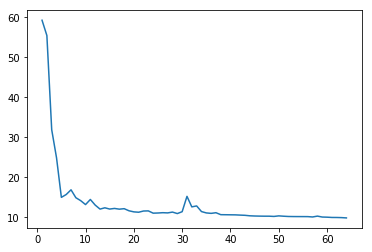

In [50]:
from matplotlib import pyplot as plt
plt.plot(range(1,65),MAPES)


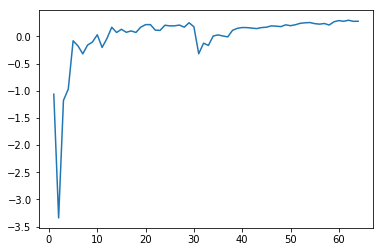

In [51]:
plt.plot(range(1,65),r2s)

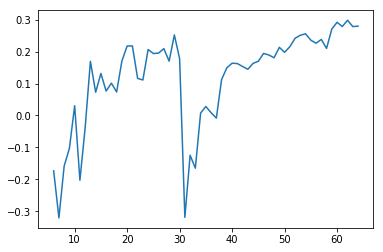

In [52]:
plt.plot(range(6,65),r2s[5:])

### It seems like our r2 scores plunge in particular when we pass through town?

## With neural networks

In [4]:
from sklearn.neural_network import MLPRegressor as mlp
features = ['rain','temp','vappr','day','hour','actualtime_arr_from']
y_scalers=[]
from sklearn.preprocessing import MinMaxScaler as mms

for i in range(1,len(route)-1):
    stopA = str(route[i])
    stopB = str(route[i+1])
    print('Building for',stopA,'to',stopB)

    df = stop_tools.stop_data(stopA,stopB)
    df['traveltime'] = df['actualtime_arr_to'] - df['actualtime_arr_from']
    df = df[df['traveltime']>0]
    scaler = ss()
    X = scaler.fit_transform(df[features])
    y_scaler = ss()
    Y = y_scaler.fit_transform(df['traveltime'].values.reshape(-1,1))
    model = mlp().fit(X,Y)
    preds = model.predict(X)
    preds = y_scaler.inverse_transform(preds)
    from sklearn import metrics
    print('model for:',stopA,'to',stopB)
    print('min pred:',preds.min())
    print('mean pred:',preds.mean())
    print('max pred:',preds.max())
    print('Mape:',((abs(df['traveltime']-preds)/df['traveltime'])*100).mean())
    print('r2:',metrics.r2_score(df['traveltime'],preds))
    print('mae:',metrics.mean_absolute_error(df['traveltime'],preds),'\n\n')
    models.append(model)
    scalers.append(scaler)
    y_scalers.append(y_scaler)
    del(df)


Building for 6318 to 6319


/home/student/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/student/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model for: 6318 to 6319
min pred: 19.94171888406954
mean pred: 23.99845931422903
max pred: 45.02779841120652
Mape: 20.44164533678574
r2: 0.006283055205644317
mae: 5.2445256095477815 


Building for 6319 to 7246
model for: 6319 to 7246
min pred: 29.01320547106985
mean pred: 41.605122300925416
max pred: 70.94968753407687
Mape: 33.287488953390294
r2: 0.0197743778456414
mae: 11.955319220449839 


Building for 7246 to 6320
model for: 7246 to 6320
min pred: 69.22585093609196
mean pred: 89.48380001383639
max pred: 108.21226331331903
Mape: 22.46307630513787
r2: 0.01517780061925178
mae: 19.772006352484276 


Building for 6320 to 4594
model for: 6320 to 4594
min pred: 14.173828684724313
mean pred: 84.18395963838803
max pred: 226.62274281945685
Mape: 27.25813266603187
r2: 0.26012639758956957
mae: 24.647907730184738 


Building for 4594 to 4595
model for: 4594 to 4595
min pred: 64.20721624062602
mean pred: 91.91593880616459
max pred: 121.27863508994261
Mape: 17.58643622866787
r2: 0.166322715785780

/home/student/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


model for: 4495 to 7581
min pred: 94.14146526570713
mean pred: 240.89006295651308
max pred: 414.75125149493056
Mape: 33.508125562128164
r2: 0.3146449406609402
mae: 66.49065317158906 


Building for 7581 to 1283
model for: 7581 to 1283
min pred: 67.58373735049992
mean pred: 134.90244127385103
max pred: 199.188131133387
Mape: 24.144677715475986
r2: 0.2788252969448629
mae: 29.920918411741148 


Building for 1283 to 7579
model for: 1283 to 7579
min pred: 35.61593482235219
mean pred: 119.67222241185941
max pred: 175.11781615305966
Mape: 25.887043877623142
r2: 0.23115517164239074
mae: 27.60298942550758 


Building for 7579 to 1285
model for: 7579 to 1285
min pred: -33.75033147598376
mean pred: 141.1310594175551
max pred: 306.2581905762397
Mape: 29.864805124207972
r2: 0.2396584453322116
mae: 35.971314891855265 


Building for 1285 to 1016
model for: 1285 to 1016
min pred: 45.062577987137146
mean pred: 152.13394175749173
max pred: 230.99575391341594
Mape: 28.398230197249685
r2: 0.2073871354124

In [32]:
import pickle
with open('/data/chainedneuralmodels.bin','rb') as handle:
   
    d=pickle.load(handle)
models = d['models']
scalers = d['x-scalers']
y_scalers = d['y-scalers']

In [33]:
def get_merged(stop):
    route = routes['15'][1][1:]
    begins = stop_tools.stop_data(str(route[0]),str(route[1]))
    ends = stop_tools.stop_data(str(route[int(stop)]),str(route[int(stop)+1]))
    ends['end'] = ends['actualtime_arr_to']
    
    merged = pd.merge(begins,ends[['tripid','dayofservice','routeid','end']], on=['tripid','dayofservice','routeid'])
    
    return merged

In [36]:
def run_to_stop(number,verbose=True):
    features = ['rain','temp','vappr','day','hour','actualtime_arr_from']
    import copy
    global route
    stop = str(route[number])
    index = 0
    merged = get_merged(number)
    df = copy.deepcopy(merged)
    for i,model in enumerate(models):
        
        index+=1
        cur_stop = route[index]
        if cur_stop == route[number+1]:
            break
        X=copy.deepcopy(df[features])
        X = scalers[i].transform(X)
        traveltime = model.predict(X)
        traveltime = y_scalers[i].inverse_transform(traveltime)
        #print(traveltime.mean())
        df['actualtime_arr_from'] = df['actualtime_arr_from'] + traveltime
        df = df[[i for i in df.columns if i[0:4] != 'hour']]
        df['hour'] = (df['actualtime_arr_from'] //3600).astype('int64')
        #arr.append(copy.deepcopy(df))

        
    real_traveltimes = merged['end'] - merged['actualtime_arr_from']

    pred_traveltimes = df['actualtime_arr_from'] - merged['actualtime_arr_from']
    if verbose:
        print(df['actualtime_arr_from'].mean())
        print('MAE:',metrics.mean_absolute_error(real_traveltimes,pred_traveltimes))
        print('MAPE:',((abs(real_traveltimes-pred_traveltimes)/real_traveltimes)*100).mean())
        print('r2:',metrics.r2_score(real_traveltimes,pred_traveltimes))
    return metrics.r2_score(real_traveltimes,pred_traveltimes),((abs(real_traveltimes-pred_traveltimes)/real_traveltimes)*100).mean()

In [37]:
MAPES = []
r2s = []
t = time.time()
for i in range(1,69):
    print(i)
    r2,MAPE = run_to_stop(i,verbose=False)
    r2s.append(r2)
    MAPES.append(MAPE)
print(time.time()-t)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
306.5710062980652


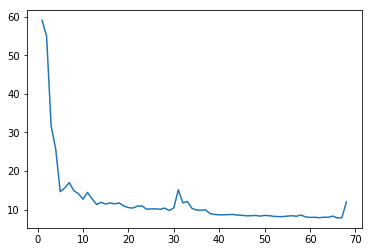

In [22]:
from matplotlib import pyplot as plt
plt.plot(range(1,69),MAPES)
plt.show()

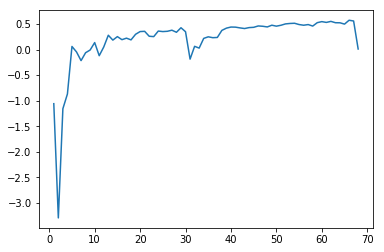

In [23]:
from matplotlib import pyplot as plt
plt.plot(range(1,69),r2s)


In [11]:
import pickle
with open('/data/chainedneuralmodels.bin','wb') as handle:
    d= {'models':models,\
       'x-scalers':scalers,\
        'y-scalers':y_scalers}
    pickle.dump(d,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [14]:
len(models)

69

A reason not to use these is that these sixty models and scalers pickle to about 6 megabytes. We would need roughly 500-600 megabytes of models in memory then, just to run our time table predictions quickly. Though it is possible we could just load and delete them as needed, the linear models are miniscule in comparison.

They also take much longer to predict than the linear models, (but only slightly), and some still give negative predictions.

Also, an instance can be seen of r2 score sharply plunging at the end of the route. Though I think this is also true for the linear models. The trouble is that, since the training time is so greatly increased, it will be harder to avoid this. Harder than with the liner models anyway.

The r2 scores are significantly better, but the MAPE isn't. The r2 matters to us as data scientists, but it would seem like a) MAPE and b) actually having a working app would be of more concern to the user.






In [25]:
sum(MAPES)/len(MAPES)

12.103629580532802

The Mean MAPE was about 13% for the linear models. They're also much faster.